In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# EJERCICIO 1: CARGA DE DATOS Y EXPLORACIÓN INICIAL

df_clientes = pd.read_csv("data/clientes.csv", index_col="cliente_id")
df_pedidos = pd.read_csv("data/pedidos.csv", index_col="pedido_id")

In [48]:
df_clientes.head(5)

,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
cliente_id,,,,,,,,
1,María García,cliente1@email.com,645-350-328,Valencia,65.0,Premium,2023-10-17,4467.0
2,Carlos Díaz,cliente2@email.com,614-130-195,Sevilla,32.0,Básico,2023-05-17,NaN
3,Francisco González,cliente3@email.com,NaN,Málaga,32.0,Standard,2023-04-21,2278.0
4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.0,Premium,2021-11-20,837.0
5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.0,Standard,2020-03-29,3763.0


In [5]:
df_pedidos.head(5)

,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
pedido_id,,,,,,,,
1,25.0,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
2,NaN,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86
3,NaN,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
4,NaN,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58
5,NaN,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63


In [10]:
print("Clientes:", df_clientes.dtypes, df_clientes.shape, sep = "\n")
print("Pedidos:", df_pedidos.dtypes, df_pedidos.shape, sep = "\n")

Clientes:
nombre               object
email                object
telefono             object
ciudad               object
edad                float64
categoria            object
fecha_registro       object
puntos_fidelidad    float64
dtype: object
(50, 8)
Pedidos:
cliente_id         float64
producto            object
cantidad           float64
precio_unitario    float64
fecha_pedido        object
estado              object
descuento          float64
total              float64
dtype: object
(200, 8)


In [12]:
df_clientes.describe()

,edad,puntos_fidelidad
count,45.000000,46.000000
mean,47.466667,2335.260870
std,19.870719,1463.688862
min,21.000000,64.000000
25%,31.000000,1279.500000
50%,41.000000,2016.500000
75%,67.000000,3448.750000
max,80.000000,4780.000000


In [13]:
df_pedidos.describe()

,cliente_id,cantidad,precio_unitario,descuento,total
count,89.000000,194.000000,200.000000,192.000000,200.000000
mean,25.910112,3.134021,973.564850,0.146510,2539.302850
std,14.146667,1.378058,560.708939,0.081964,1913.677964
min,1.000000,1.000000,20.450000,0.010000,76.110000
25%,16.000000,2.000000,508.207500,0.080000,964.017500
50%,26.000000,3.000000,935.775000,0.140000,2115.340000
75%,37.000000,4.000000,1480.177500,0.210000,3738.877500
max,50.000000,5.000000,1989.110000,0.300000,8019.000000


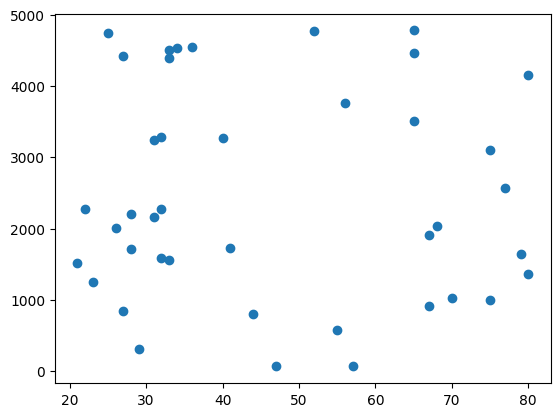

In [20]:
# Únicamente por probar

fig, ax = plt.subplots()
ax.scatter(df_clientes["edad"], df_clientes["puntos_fidelidad"])
plt.show()

<Axes: >

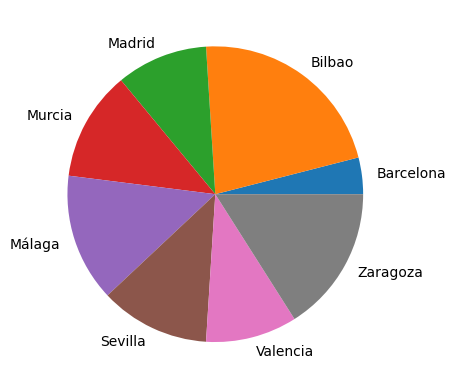

In [38]:
df_clientes.groupby(
    by="ciudad"
).size().plot.pie()

In [39]:
# EJERCICIO 2: CONSULTAS BÁSICAS

# 1. Clientes de Madrid mayores de 30 años

df_clientes[(df_clientes["ciudad"] == "Madrid") & (df_clientes["edad"] > 30)]

,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
cliente_id,,,,,,,,
10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.0,Premium,2021-10-08,3286.0
28,María Martínez,cliente28@email.com,693-653-956,Madrid,80.0,Premium,2021-04-29,1362.0


In [ ]:
# 2. Clientes Premium o que tengan más de 3000 puntos de fidelidad

df_clientes[(df_clientes["categoria"] == "Premium") | (df_clientes["puntos_fidelidad"] > 3000)]

,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
cliente_id,,,,,,,,
1,María García,cliente1@email.com,645-350-328,Valencia,65.0,Premium,2023-10-17,4467.0
4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.0,Premium,2021-11-20,837.0
5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.0,Standard,2020-03-29,3763.0
10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.0,Premium,2021-10-08,3286.0
11,Elena Rodríguez,cliente11@email.com,637-680-997,Zaragoza,31.0,Básico,2022-10-19,3241.0
12,Carmen Sánchez,cliente12@email.com,643-242-352,Bilbao,65.0,Básico,2022-05-27,4780.0
13,Paula Ruiz,cliente13@email.com,638-241-621,Murcia,23.0,Premium,2020-08-12,1252.0
16,Javier Díaz,cliente16@email.com,630-564-103,Bilbao,80.0,Básico,2020-12-31,4158.0
17,María Martín,cliente17@email.com,691-619-723,Sevilla,27.0,Standard,2020-11-26,4418.0


In [56]:
# 3. Pedidos con total mayor a 500 euros

df_pedidos[df_pedidos["total"] > 500]

,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
pedido_id,,,,,,,,
1,25.0,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
2,NaN,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86
3,NaN,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
4,NaN,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58
5,NaN,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63
...,...,...,...,...,...,...,...,...
195,NaN,Router WiFi,5.0,566.64,2023-11-16,Completado,0.04,2719.87
196,NaN,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65
198,NaN,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39


In [64]:
# 4. Pedidos pendientes del año 2023

df_pedidos[(df_pedidos["fecha_pedido"].str.startswith("2023")) & (df_pedidos["estado"] == "Pendiente")]

,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
pedido_id,,,,,,,,
1,25.0,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
3,NaN,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
7,NaN,Smartphone,2.0,1348.86,2023-04-26,Pendiente,0.04,2589.81
9,41.0,Smartwatch,4.0,993.81,2023-05-05,Pendiente,0.20,3180.19
15,6.0,Tablet,2.0,772.24,2023-03-20,Pendiente,0.02,1513.59
23,31.0,Smartwatch,5.0,113.65,2023-06-29,Pendiente,0.20,454.60
26,NaN,Tablet,5.0,1218.42,2023-02-28,Pendiente,NaN,4325.39
41,NaN,"Monitor 24""",3.0,367.09,2023-01-08,Pendiente,0.08,1013.17
45,NaN,Smartphone,2.0,245.72,2023-08-02,Pendiente,0.23,378.41
